In [1]:
# Package imports
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import warnings
from sklearn.metrics import roc_curve
from sklearn.utils import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, KFold, StratifiedShuffleSplit,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [2]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_14d326a3558e4fc0bfeb2361ed8fd35c(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_3c25b61fef62727472d70bdd15a6ecc3b9af4f3b','domain': {'id': 'fcf7d2f57ba04101a6ee7e43c6b09dc5'},
            'password': 'VW28-eGxM{X-!mji'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_14d326a3558e4fc0bfeb2361ed8fd35c('ADSAssignment2', 'Final_loan.csv'))
df_data_1.head()


,loan_amnt,last_meanfico,dti,addr_state,emp_length,policy_code,purpose,issue_month,issue_year,status
0,5000,737,27.65,AZ,10,1,credit_card,12,2011,1
1,2500,742,1.00,GA,1,1,car,12,2011,1
2,2400,737,8.72,IL,10,1,small_business,12,2011,1
3,10000,692,20.00,CA,10,1,other,12,2011,1
4,3000,697,17.94,OR,1,1,other,12,2011,1


In [3]:
#Keep the following 6 features (variables) which are important
cols_to_keep = ['loan_amnt', 'last_meanfico', 'dti','addr_state','emp_length','purpose']
train, test = sklearn.cross_validation.train_test_split(df_data_1, train_size = 0.7)
train_y = train['status']
test_y = test['status']
train_x = train[cols_to_keep]
test_x = test[cols_to_keep]

In [4]:
from sklearn import preprocessing
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
# State is string and we want discre integer values
train_x['state'] = label_encoder.fit_transform(train_x['addr_state'])
test_x['state'] = label_encoder.fit_transform(test_x['addr_state'])
train_x['purp'] = label_encoder.fit_transform(train_x['purpose'])
test_x['purp'] = label_encoder.fit_transform(test_x['purpose'])

In [5]:
train_x = train_x._get_numeric_data()
test_x = test_x._get_numeric_data()

In [6]:
train_x.head()

,loan_amnt,last_meanfico,dti,emp_length,state,purp
6666991,5000,501,13.97,1,37,55
460892,10000,697,3.72,10,5,49
6289137,7000,304,10.60,1,20,45
12054109,25000,304,69.76,1,2,45
11516824,1500,304,319.24,1,36,52


In [8]:
def calculate_roc_curve(Y_test, y_pred, pos_label):    
    fpr, tpr, _ = roc_curve(Y_test, preds)
    #Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

def calculate_confusion_matrix(y_true, y_pred):    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

('Intercept is ', array([-4.35235659]))
('Coefficient is ', array([[ -2.07088278e-05,   6.27878832e-03,  -2.32898171e-02,
          3.20780048e-01,  -1.67046429e-02,  -2.21743219e-02]]))


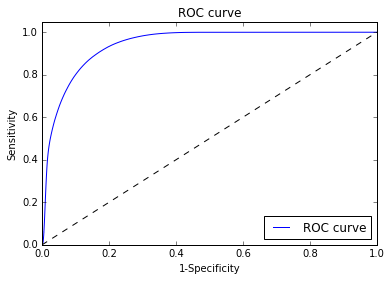

[[3256338   67854]
 [ 213655  182523]]
0.924333063647


In [9]:
#logistic regression
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_x)

#calculate ROC curve
preds = log_reg.predict_proba(test_x)[:,1]
calculate_roc_curve(test_y, preds,2)

#calculate Confusion Matrix
calculate_confusion_matrix(test_y, y_pred)

print(accuracy_score(test_y, y_pred))


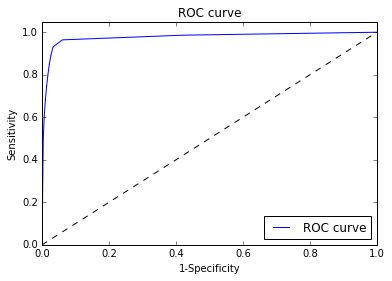

[[3266240   57952]
 [  79249  316929]]
0.963121678758


In [10]:
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_x, train_y)
preds = rf.predict_proba(test_x)[:,1]
y_pred=rf.predict(test_x)
#calculate ROC curve
calculate_roc_curve(test_y, y_pred,2) 
 #calculate Confusion Matrix

calculate_confusion_matrix(test_y, y_pred)
print(accuracy_score(test_y, y_pred))

In [ ]:
print("Staring Support Vector Machine")
clf = SVC()
clf.fit(train_x, train_y)
y_pred=clf.predict(test_x)

#calculate ROC curve
preds = clf.predict_proba(test_x)[:,1]
calculate_roc_curve(test_y, preds,2) 
 #calculate Confusion Matrix

calculate_confusion_matrix(Y_test, y_pred)
print(accuracy_score(Y_test, y_pred))

In [12]:
# RFE Code to extract features
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(train_x, train_y)
print("Num Features:", fit.n_features_)
print("Selected Features" , fit.support_)
print("Feature Ranking: ", fit.ranking_)

('Num Features:', 5)
('Selected Features', array([False,  True,  True,  True,  True,  True], dtype=bool))
('Feature Ranking: ', array([2, 1, 1, 1, 1, 1]))


In [13]:
#stats model for feature extraction
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
logit = sm.Logit(train_y, train_x)
affair_mod = logit.fit()
print(affair_mod.summary())

Optimization terminated successfully.
         Current function value: 0.266703
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:              8680863
Model:                          Logit   Df Residuals:                  8680857
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 Apr 2017   Pseudo R-squ.:                  0.2142
Time:                        02:12:54   Log-Likelihood:            -2.3152e+06
converged:                       True   LL-Null:                   -2.9464e+06
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
loan_amnt     -4.056e-05   1.29e-07   -315.473      0.000     -4.08e-05 -4.03e-05
last_meanfico     0

In [ ]:
# build a neural network
 
#Calculating rows and columns for input dfs
trn_rows,trn_cols=train_x.shape
tst_rows,tst_cols=test_x.shape

# build train dataset
train_data = ClassificationDataSet(trn_cols, 1 , nb_classes=2)
for k in range(len(train_x)): 
    train_data.addSample(train_x.iloc[k],train_y.iloc[k]) 

# build test dataset
test_data = ClassificationDataSet(tst_cols, 1 , nb_classes=2)
for k in range(len(test_x)): 
    test_data.addSample(test_x.iloc[k],test_y.iloc[k])


print("Train Dataset input length: {}".format(len(train_data['input'])))
print("Train Dataset output length: {}".format(len(train_data['target'])))
print("Train Dataset input|output dimensions are {}|{}".format(train_data.indim, train_data.outdim))

print("Train Data length: {}".format(len(train_data)))
print("Test Data length: {}".format(len(test_data)))

# encode with one output neuron per class
train_data._convertToOneOfMany()
test_data._convertToOneOfMany()

print("Train Data input|output dimensions are {}|{}".format(train_data.indim, train_data.outdim))
print("Test Data input|output dimensions are {}|{}".format(test_data.indim, test_data.outdim))

# build network (INPUT=10,HIDDEN=5,CLASSES=2,outclass=SoftmaxLayer)
print("Building Neural network with 5 hidden layer")
network = buildNetwork(train_data.indim,5,train_data.outdim,outclass=SoftmaxLayer)

# train network
print("Training the network, it may take a while...")
trainer = BackpropTrainer(network,dataset=train_data,momentum=0.1,verbose=True,weightdecay=0.01)
trainer.trainOnDataset(train_data, 1) #training model on One epoch

print("Total epochs: {}".format(trainer.totalepochs))

# test network
print("Predicting the output array with the trained model")
output = network.activateOnDataset(test_data).argmax(axis=1)

#Neural network Percent error and accuracy    
print("Percent error: {}".format(percentError(output, test_data['class'])))
print("Model Accuracy: {}".Validator.classificationPerformance(output, test_y))

#Compute confusion metrics
calculate_confusion_matrix(test_y,output)      
